In [50]:
from epyt import epanet
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#print(dir(epanet))

In [4]:
d=epanet("Net1.inp")

EPANET version 20200 loaded (EPyT version 1.1.8).
Input File Net1.inp loaded successfully.



In [5]:
node_count=d.getNodeCount()

In [6]:
print(f"Total Nodes:{node_count}")

Total Nodes:11


In [7]:
node_names=d.getNodeNameID()

In [8]:
print(f"Nodes Names:{node_names}")

Nodes Names:['10', '11', '12', '13', '21', '22', '23', '31', '32', '9', '2']


In [9]:
d.getNodeElevations(node_names[0])

800.0

In [10]:
for node in node_names[:5]:
    elevation=d.getNodeElevations(node)
    base_demand=d.getNodeBaseDemands(node)
    print(f"Node {node}:Elevation={elevation},Base Demand={base_demand}")

Node 10:Elevation=800.0,Base Demand={1: array([0.])}
Node 11:Elevation=850.0,Base Demand={1: array([150.])}
Node 12:Elevation=0.0,Base Demand={1: array([150.])}
Node 13:Elevation=0.0,Base Demand={1: array([100.])}
Node 21:Elevation=0.0,Base Demand={1: array([150.])}


/home/wahab901278/anaconda3/lib/python3.11/site-packages/epyt/epanet.py:14234: UserWarning: Error 203: function call contains undefined node
  warnings.warn(errmssg.value.decode())
/home/wahab901278/anaconda3/lib/python3.11/site-packages/epyt/epanet.py:14234: UserWarning: Error 203: function call contains undefined node
  warnings.warn(errmssg.value.decode())
/home/wahab901278/anaconda3/lib/python3.11/site-packages/epyt/epanet.py:14234: UserWarning: Error 203: function call contains undefined node
  warnings.warn(errmssg.value.decode())


In [11]:
link_count=d.getLinkCount()

In [12]:
link_count

13

In [13]:
link_names=d.getLinkNameID()

In [14]:
link_names

['10',
 '11',
 '12',
 '21',
 '22',
 '31',
 '110',
 '111',
 '112',
 '113',
 '121',
 '122',
 '9']

In [15]:
for link in link_names[:5]:
    length=d.getLinkLength(link)
    diameter=d.getLinkDiameter(link)
    roughness=d.getLinkRoughnessCoeff(link)
    print(f"Pipe {link}:Lengths={length},Diameter={diameter},Roughness={roughness}")

Pipe 10:Lengths=5280.0,Diameter=8.0,Roughness=100.0
Pipe 11:Lengths=5280.0,Diameter=8.0,Roughness=100.0
Pipe 12:Lengths=5280.0,Diameter=6.0,Roughness=100.0
Pipe 21:Lengths=0.0,Diameter=0.0,Roughness=0.0
Pipe 22:Lengths=0.0,Diameter=0.0,Roughness=0.0


/home/wahab901278/anaconda3/lib/python3.11/site-packages/epyt/epanet.py:14234: UserWarning: Error 204: function call contains undefined link
  warnings.warn(errmssg.value.decode())
/home/wahab901278/anaconda3/lib/python3.11/site-packages/epyt/epanet.py:14234: UserWarning: Error 204: function call contains undefined link
  warnings.warn(errmssg.value.decode())
/home/wahab901278/anaconda3/lib/python3.11/site-packages/epyt/epanet.py:14234: UserWarning: Error 204: function call contains undefined link
  warnings.warn(errmssg.value.decode())
/home/wahab901278/anaconda3/lib/python3.11/site-packages/epyt/epanet.py:14234: UserWarning: Error 204: function call contains undefined link
  warnings.warn(errmssg.value.decode())
/home/wahab901278/anaconda3/lib/python3.11/site-packages/epyt/epanet.py:14234: UserWarning: Error 204: function call contains undefined link
  warnings.warn(errmssg.value.decode())
/home/wahab901278/anaconda3/lib/python3.11/site-packages/epyt/epanet.py:14234: UserWarning: Err

In [16]:
node_id=node_names[0]

In [17]:
print(node_id)

10


In [18]:
print(d.getNodeIndex(node_id))

1


In [19]:
link_id=link_names[0]

In [20]:
print(d.getLinkIndex(link_id))

1


In [24]:
new_diameter=0.5
d.setLinkDiameter(1,new_diameter)

In [25]:
d.getLinkDiameter(1)

array(0.5)

In [26]:
d.setNodeBaseDemands(3,80)

In [28]:
d.getNodeBaseDemands(3)

{1: array([80.])}

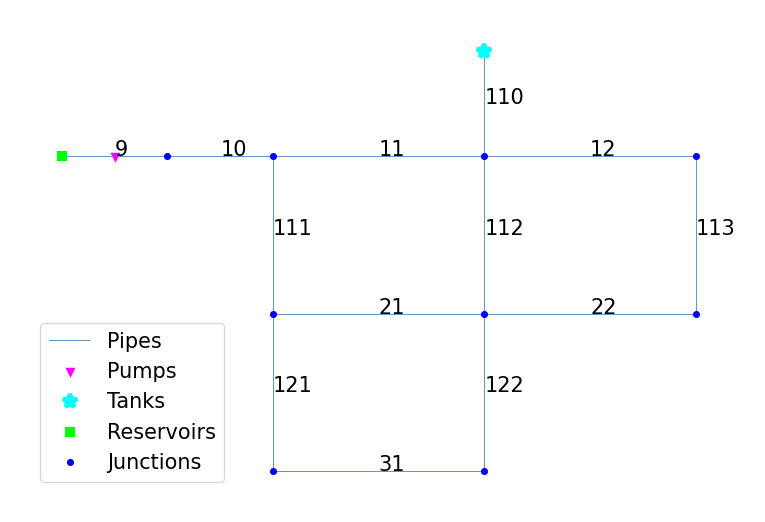

In [36]:
d.plot(linksID=True)
plt.show()

In [37]:
d.unload()

Close toolkit for the input file "Net1". EPANET Toolkit is unloaded.



In [38]:
d=epanet('Net1.inp')

EPANET version 20200 loaded (EPyT version 1.1.8).
Input File Net1.inp loaded successfully.



In [46]:
link_id=link_names[1]
link_index=d.getLinkIndex(link_id)
print(link_index)

2


In [42]:
Status=[0,0,0,1,0,1,1,0,1,0,0,1,0,1]

In [44]:
d.openHydraulicAnalysis()
d.initializeHydraulicAnalysis()

In [47]:
i,step,dictionary=0,1,{}

In [49]:
while step>0 and i<len(Status):
    t=d.runHydraulicAnalysis()
    d.setLinkStatus(link_index,Status[i])
    i+=1
    dictionary[i]=d.getLinkFlows()
    step=d.nextHydraulicAnalysisStep()
d.closeHydraulicAnalysis()

In [53]:
flow= pd.DataFrame(dictionary).iloc[link_index-1]

In [56]:
df=pd.DataFrame({"Flows":flow,"Status":Status})

In [57]:
df

,Flows,Status
1,0.000000,0
2,0.000000,0
3,0.000000,0
4,0.000403,1
5,0.000000,0
6,0.000385,1
7,1083.053955,1
8,0.000000,0
9,0.000385,1
10,0.000000,0
